In [1]:
!python --version

Python 3.9.7


In [19]:
!java -version

java version "1.8.0_251"
Java(TM) SE Runtime Environment (build 1.8.0_251-b08)
Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)


In [2]:
import os 
import sys 
import findspark 
findspark.init()

In [3]:
import pandas as pd
import numpy as np

In [4]:
  
# reading the csv file
df = pd.read_csv("PUBFIN_20220422-101656.csv",  encoding='cp932')

# unrecognized value change to "0"
df['Value'] = df['Value'].replace({'..': '0'})

df.to_csv("rowdataset1.csv")

df


Country/area            Technology  Year Value
0      Afghanistan    Solar photovoltaic  2000     0
1      Afghanistan    Solar photovoltaic  2001   0.1
2      Afghanistan    Solar photovoltaic  2002     0
3      Afghanistan    Solar photovoltaic  2003     0
4      Afghanistan    Solar photovoltaic  2004     0
...            ...                   ...   ...   ...
51735     Zimbabwe  Multiple renewables*  2015     0
51736     Zimbabwe  Multiple renewables*  2016  0.01
51737     Zimbabwe  Multiple renewables*  2017  5.57
51738     Zimbabwe  Multiple renewables*  2018  0.01
51739     Zimbabwe  Multiple renewables*  2019  0.02

[51740 rows x 4 columns]

In [5]:
df = pd.read_csv("rowdataset1.csv")

df11 = df[(df['Value'] != 0)].drop(columns='Unnamed: 0')

df11.to_csv("rowdataset.csv")

df11

Country/area            Technology  Year  Value
1      Afghanistan    Solar photovoltaic  2001   0.10
6      Afghanistan    Solar photovoltaic  2006   0.26
10     Afghanistan    Solar photovoltaic  2010   6.52
12     Afghanistan    Solar photovoltaic  2012  18.29
13     Afghanistan    Solar photovoltaic  2013   0.16
...            ...                   ...   ...    ...
51734     Zimbabwe  Multiple renewables*  2014   0.05
51736     Zimbabwe  Multiple renewables*  2016   0.01
51737     Zimbabwe  Multiple renewables*  2017   5.57
51738     Zimbabwe  Multiple renewables*  2018   0.01
51739     Zimbabwe  Multiple renewables*  2019   0.02

[4591 rows x 4 columns]

In [30]:
df_countrysum = pd.read_csv("rowdataset.csv")

totalInvsRenewData = pd.DataFrame(columns=['Country','Year','TotalInvestment_Millions(USD)'])
yearList = df_countrysum['Year'].unique()
countryArray = df_countrysum['Country/area'].unique()
# Using for loop
for country in countryArray:
    for year in yearList:
        tempDF = df_countrysum[(df_countrysum['Country/area'] == country) & (df_countrysum['Year'] == year)]
        totalInvsRenewData = totalInvsRenewData.append({'Country': country, 'Year': year, 'Total_Investment_Value(USD)': (tempDF['Value'].sum())}, ignore_index=True)
        totalInvsRenewData


In [20]:
YearSum=totalInvsRenewData.groupby('Year')['Total_Investment_Value(USD)'].agg('sum')
YearSum.to_csv("yearsum.csv")
YearSum

Year
2000     1425.27
2001     2010.53
2002     1353.53
2003     3111.01
2004     2131.23
2005     2151.71
2006     3304.95
2007     4325.76
2008     3010.32
2009    20110.21
2010    19274.40
2011    21366.91
2012    24667.16
2013    20427.35
2014    24267.36
2015    17812.93
2016    23545.50
2017    29202.65
2018    17269.37
2019    13096.31
Name: Total_Investment_Value(USD), dtype: float64

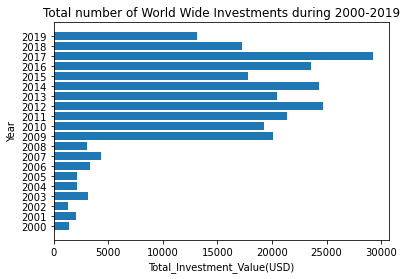

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df_year = pd.read_csv("yearsum.csv")

plt.title("Total number of World Wide Investments during 2000-2019")
plt.ylabel("Year") 
plt.xlabel("Total_Investment_Value(USD)") 

plt.barh(df_year["Year"], df_year["Total_Investment_Value(USD)"], tick_label=df_year["Year"],
             align="center") 

plt.show()


In [7]:
# read dataframe
df_usa = pd.read_csv("rowdataset.csv")
#sort by 
cleanedDF2 = df_usa[(df_usa['Country/area'] == "United States of America")] .sort_values(by=["Value"], ascending=False).iloc[0:10].drop(columns='Unnamed: 0')

cleanedDF2.to_csv("usa.csv")
cleanedDF2

Country/area            Technology  Year   Value
4295  United States of America   Onshore wind energy  2011  105.03
4294  United States of America   Onshore wind energy  2010   55.50
4297  United States of America  Multiple renewables*  2013   35.06
4296  United States of America   Onshore wind energy  2012   22.01
4293  United States of America    Solar photovoltaic  2011   12.60

In [8]:
# read dataframe
df_uk = pd.read_csv("rowdataset.csv")
#sort by 
cleanedDF3 = df_uk[(df_uk["Country/area"] == "United Kingdom of Great Britain and Northern Ireland")&(df_uk['Year']==2018)].sort_values(by=["Value"], ascending=False).iloc[0:10].drop(columns='Unnamed: 0')

cleanedDF3.to_csv("uk.csv")

cleanedDF3

Country/area  \
4207  United Kingdom of Great Britain and Northern I...   
4217  United Kingdom of Great Britain and Northern I...   

                     Technology  Year    Value  
4207       Offshore wind energy  2018  1010.46  
4217  Renewable municipal waste  2018    10.19

In [9]:
# read dataframe
df_fr = pd.read_csv("rowdataset.csv")
#sort by 
cleanedDF4 = df_fr[(df_fr["Country/area"] == "France")&(df_fr['Year']==2019)].sort_values(by=["Value"], ascending=False).iloc[0:10].drop(columns='Unnamed: 0')

cleanedDF4.to_csv("fr.csv")

cleanedDF4

Country/area            Technology  Year  Value
1446       France  Multiple renewables*  2019   59.4

In [12]:
# read dataframe
df_chinaa = pd.read_csv("rowdataset.csv")
#sort by 
cleanedDF5 = df_chinaa[(df_chinaa["Country/area"] == "China")&(df_fr['Year']==2019)].sort_values(by=["Value"], ascending=False).iloc[0:10].drop(columns='Unnamed: 0')

cleanedDF5.to_csv("china.csv")

cleanedDF5

Country/area            Technology  Year   Value
843        China        Solid biofuels  2019  139.30
851        China     Geothermal energy  2019   39.20
871        China  Multiple renewables*  2019   20.11
826        China         Marine energy  2019    1.89
799        China    Solar photovoltaic  2019    0.96
811        China   Onshore wind energy  2019    0.08

In [13]:
# read dataframe
df_philippines = pd.read_csv("rowdataset.csv")

cleanedDF6 = df_philippines[(df_philippines["Country/area"] == "Philippines")&(df_usa['Year']==2019)].sort_values(by=["Value"], ascending=False).iloc[0:10]
cleanedDF6.to_csv("philippines.csv")

cleanedDF6

Unnamed: 0 Country/area            Technology  Year  Value
3361       36659  Philippines  Multiple renewables*  2019    1.2
3320       36419  Philippines    Solar photovoltaic  2019    0.8

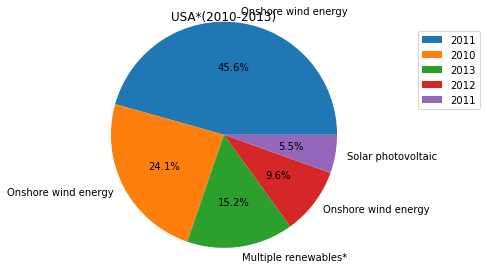

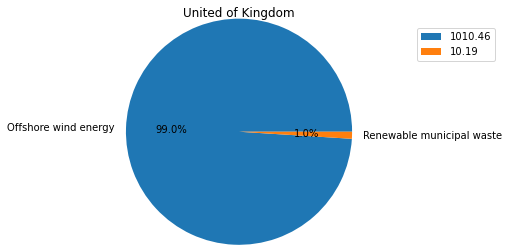

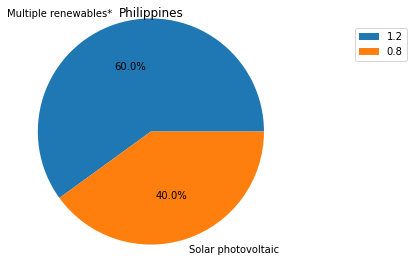

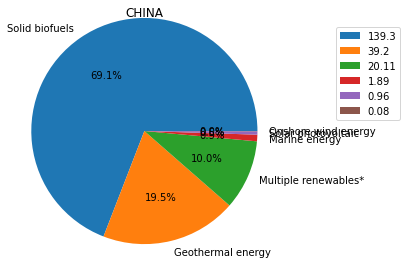

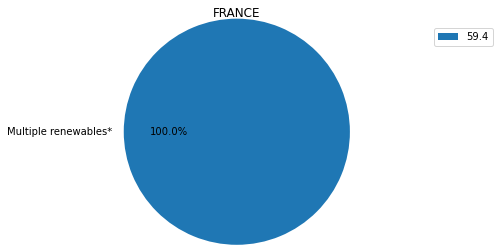

In [ ]:
#show.title("Leatest renewable energy the big countries investment (USD)")

df_usaa = pd.read_csv("usa.csv")

plt.title("USA*(2010-2013)")
plt.pie(df_usaa["Value"], labels=df_usaa["Technology"],counterclock=True,
             autopct="%1.1f%%",radius=1.3)
plt.legend(df_usaa["Year"],bbox_to_anchor=(1.7, 1))
plt.show()

df_ukk = pd.read_csv("uk.csv")

plt.title("United of Kingdom")
plt.pie(df_ukk["Value"], labels=df_ukk["Technology"],counterclock=True,
             autopct="%1.1f%%",radius=1.3)
plt.legend(df_ukk["Value"],bbox_to_anchor=(1.7, 1))

plt.show()

df_philippiness = pd.read_csv("philippines.csv")

plt.title("Philippines")
plt.pie(df_philippiness["Value"], labels=df_philippiness["Technology"],counterclock=True,
             autopct="%1.1f%%",radius=1.3)
plt.legend(df_philippiness["Value"],bbox_to_anchor=(1.7, 1))

plt.show()

df_chinaa = pd.read_csv("china.csv")

plt.title("CHINA")
plt.pie(df_chinaa["Value"], labels=df_chinaa["Technology"],counterclock=True,
             autopct="%1.1f%%",radius=1.3)
plt.legend(df_chinaa["Value"],bbox_to_anchor=(1.7, 1))

plt.show()

df_frr = pd.read_csv("fr.csv")


plt.pie(df_frr["Value"], labels=df_frr["Technology"],counterclock=True,
             autopct="%1.1f%%",radius=1.3)
plt.legend(df_frr["Value"],bbox_to_anchor=(1.7, 1))
plt.title("FRANCE")

plt.show()